In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
import tensorflow as tf
import numpy as np
pre_trained_model = tf.keras.models.load_model('saved_model/my_model')

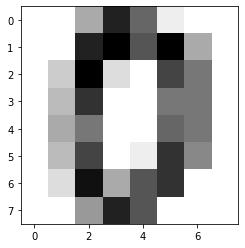

In [2]:
digits = datasets.load_digits()
digit, target = digits.images[0], digits.target[0]
plt.imshow(digit, cmap=plt.cm.gray_r)

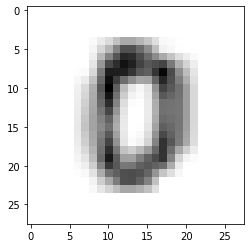

In [3]:
digit = digits.images[0]
digit = tf.constant(digit)
digit = np.pad(digit, 2)
# Add "batch" and "channels" dimensions
digit = digit[tf.newaxis, ..., tf.newaxis]
digit = tf.image.resize(digit, (28,28))
digit = digit.numpy()[0].reshape((28,28))
plt.imshow(digit, cmap=plt.cm.gray_r)

In [4]:
digit, target = digits.images[0], digits.target[0]
digit = np.pad(digit, 2)
digit = tf.constant(digit)
# Add "batch" and "channels" dimensions
digit = digit[tf.newaxis, ..., tf.newaxis]
digit = tf.image.resize(digit, (28,28))
digit = digit.numpy().reshape((1,28*28))
digit.shape

(1, 784)

In [5]:
fn = lambda img : np.pad(img, 2)
digits.images = np.array([fn(img) for img in digits.images ])

In [6]:
pred = np.argmax(pre_trained_model.predict(digit))
pred == target

1/1 [==============================] - 0s 237ms/step


True

In [7]:
def transform_input(method = 'bilinear', pad_width = 0):
    digits = datasets.load_digits()
    digits, labels = digits.images, digits.target
    fn = lambda img : np.pad(img, pad_width)
    digits= np.array([fn(img) for img in digits])
    digits = tf.constant(digits)
    digits = digits[..., tf.newaxis]
    digits = tf.image.resize(digits, (28,28))
    digits = digits.numpy()
    digits = digits.reshape(-1,28*28)
    return digits, labels

In [8]:
digits, labels = transform_input()
digits.shape

(1797, 784)

In [9]:
resize_methods = tf.image.ResizeMethod.__dict__
resize_methods = [v for k,v in resize_methods.items() if '_' not in k]
resize_methods

['bilinear',
 'bicubic',
 'area',
 'lanczos3',
 'lanczos5',
 'gaussian',
 'mitchellcubic']

In [10]:
for method in resize_methods:
    digits,labels = transform_input(method)
    probabilities = pre_trained_model.predict(digits, steps=1)
    predicted_labels = np.argmax(probabilities, axis=1)
    res = predicted_labels == labels
    print(method, sum(res) / res.shape[0])

1/1 [==============================] - 0s 217ms/step
bilinear 0.5203116304952699
1/1 [==============================] - 0s 201ms/step
bicubic 0.5203116304952699
1/1 [==============================] - 0s 208ms/step
area 0.5203116304952699
1/1 [==============================] - 0s 209ms/step
lanczos3 0.5203116304952699
1/1 [==============================] - 0s 227ms/step
lanczos5 0.5203116304952699
1/1 [==============================] - 0s 234ms/step
gaussian 0.5203116304952699
1/1 [==============================] - 0s 213ms/step
mitchellcubic 0.5203116304952699


In [11]:
for p in range(10) :
    digits,labels = transform_input(pad_width=p)
    probabilities = pre_trained_model.predict(digits, steps=1)
    predicted_labels = np.argmax(probabilities, axis=1)
    res = predicted_labels == labels
    print(p, sum(res) / res.shape[0])

1/1 [==============================] - 0s 202ms/step
0 0.5203116304952699
1/1 [==============================] - 0s 217ms/step
1 0.6204785754034502
1/1 [==============================] - 0s 222ms/step
2 0.6154702281580412
1/1 [==============================] - 0s 208ms/step
3 0.6188091263216472
1/1 [==============================] - 0s 202ms/step
4 0.5943238731218697
1/1 [==============================] - 0s 206ms/step
5 0.5392320534223706
1/1 [==============================] - 0s 219ms/step
6 0.3528102392877017
1/1 [==============================] - 0s 203ms/step
7 0.26822481914301616
1/1 [==============================] - 0s 212ms/step
8 0.2921535893155259
1/1 [==============================] - 0s 204ms/step
9 0.2659988870339455
